In [110]:
import pandas as pd
from sklearn.feature_selection import f_regression

In [111]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.isnull().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [112]:
train_data = train_data.drop(['id','f_27'], axis=1)
test_data = test_data.drop(['f_27'], axis=1)

train_data.describe(include='all')

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,2.362431,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,1.637706,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,14.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = train_data.drop('target', axis=1)
y = train_data['target']
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [115]:
from sklearn.linear_model import LogisticRegression


lr= LogisticRegression()
lr.fit(x_train, y_train)

f_regression(train_data,train_data['target'])

p_values = f_regression(train_data,train_data['target'])[1]


reg_summary = pd.DataFrame(data= train_data.columns.values,columns=['Features'])
reg_summary['p-values'] = p_values.round(3)

print( lr.coef_.round(3))
print(reg_summary)

acc = lr.score(x_test, y_test)
print(f'accuracy: {acc*100}%')
 



[[ 1.126e+00  1.132e+00  6.620e-01  1.900e-02  2.500e-02  7.020e-01
  -2.000e-03 -8.700e-02  6.400e-01  1.301e+00 -4.690e-01 -1.438e+00
   5.400e-02 -5.310e-01 -3.990e-01  7.340e-01 -1.062e+00  2.300e-01
  -2.140e-01 -1.778e+00 -1.003e+00  3.166e+00  1.524e+00  1.364e+00
   1.628e+00 -5.490e-01  1.156e+00 -2.900e-02  3.260e-01  2.720e-01]]
   Features  p-values
0      f_00     0.000
1      f_01     0.000
2      f_02     0.000
3      f_03     0.855
4      f_04     0.880
5      f_05     0.000
6      f_06     0.360
7      f_07     0.000
8      f_08     0.000
9      f_09     0.000
10     f_10     0.000
11     f_11     0.000
12     f_12     0.361
13     f_13     0.000
14     f_14     0.000
15     f_15     0.000
16     f_16     0.000
17     f_17     0.082
18     f_18     0.000
19     f_19     0.000
20     f_20     0.000
21     f_21     0.000
22     f_22     0.000
23     f_23     0.000
24     f_24     0.000
25     f_25     0.000
26     f_26     0.000
27     f_28     0.000
28     f_29     0.00

In [116]:
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
sns.set()

In [61]:
num_cols  =  ['f_00',
             'f_01',
             'f_02',
             'f_03',
             'f_04',
             'f_05',
             'f_06',
             'f_19',
             'f_20',
             'f_21',
             'f_22',
             'f_23',
             'f_24',
             'f_25',
             'f_26',
             'f_28',]

  0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

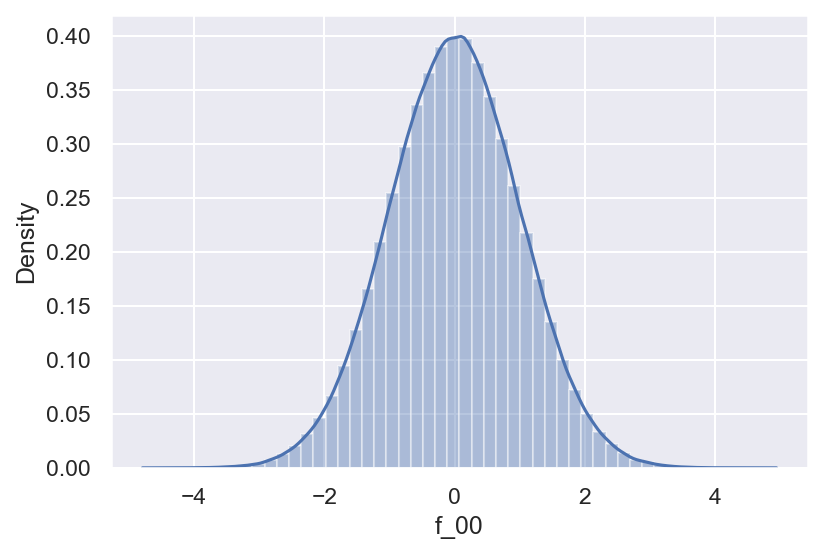

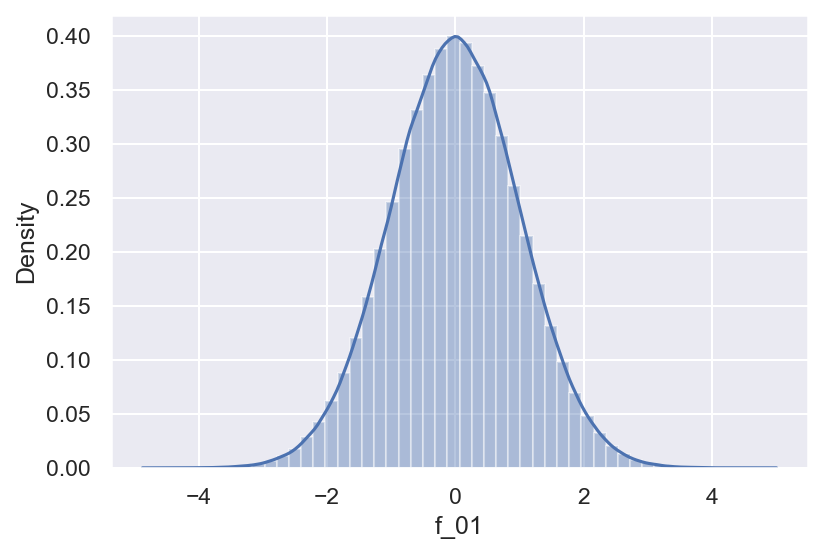

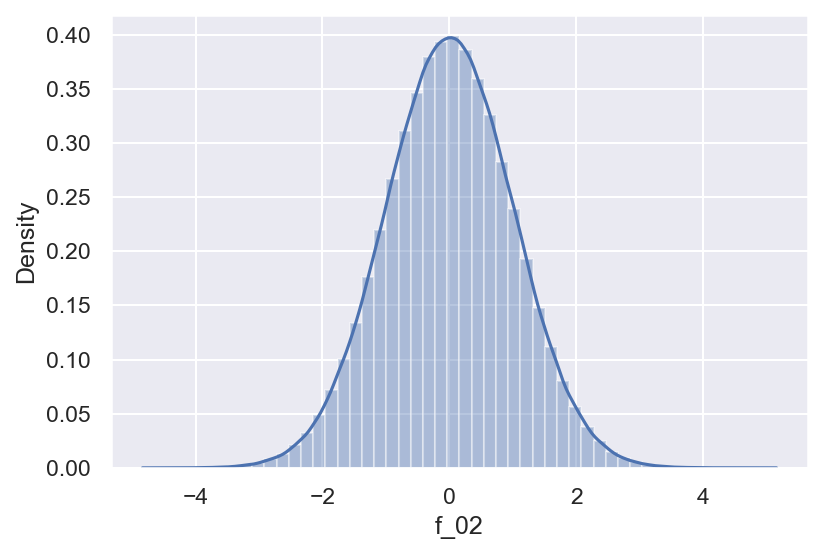

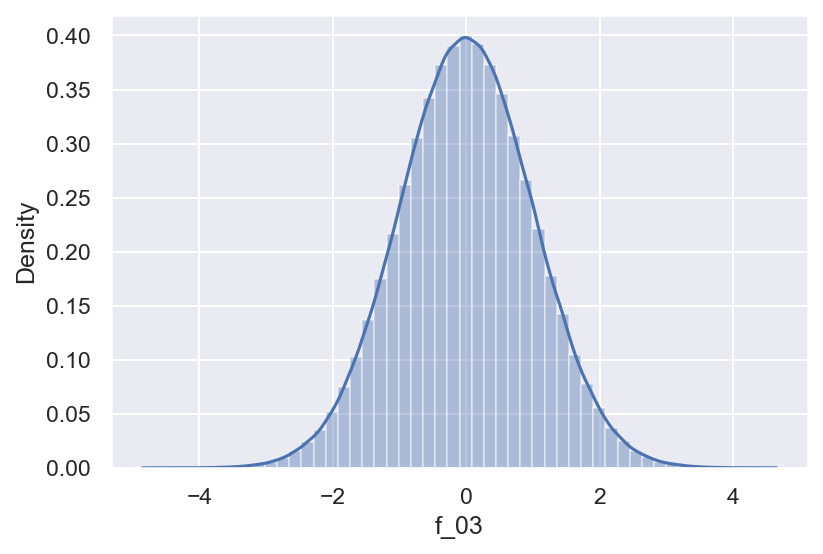

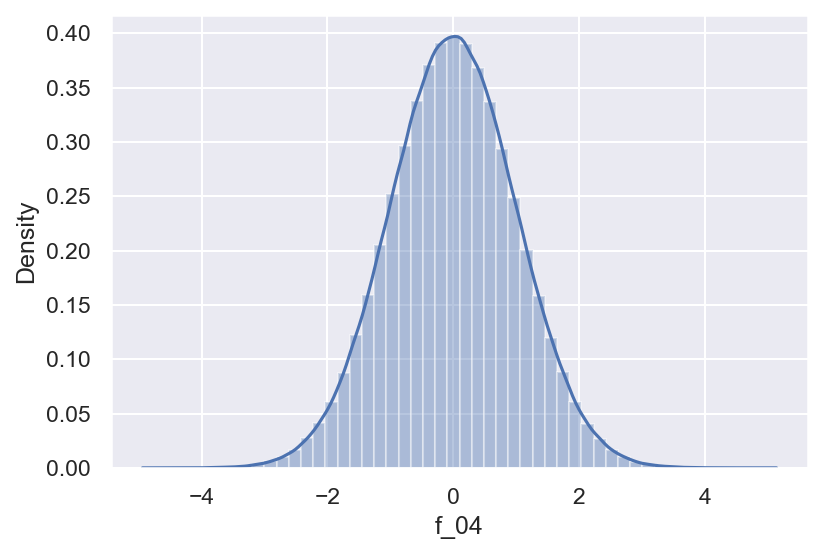

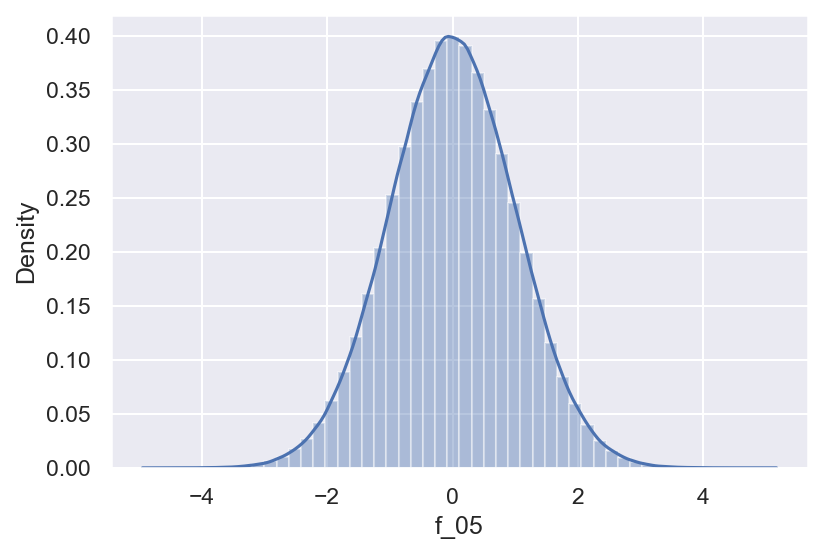

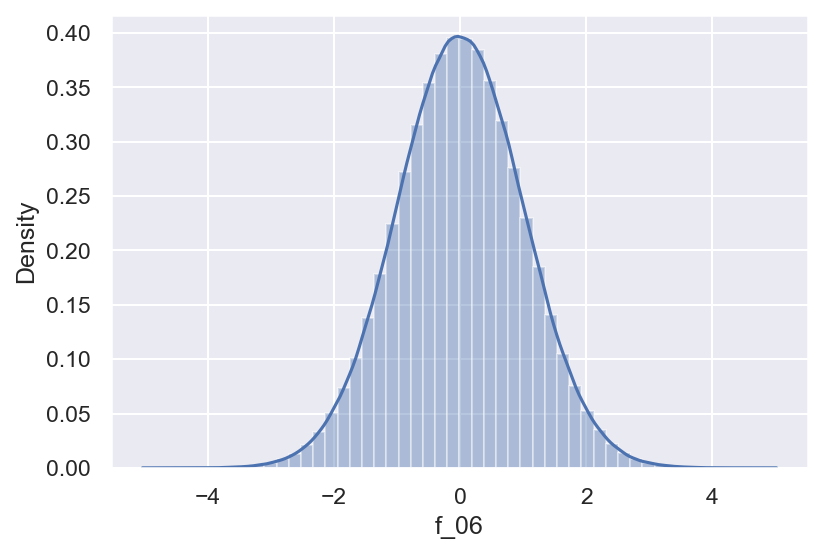

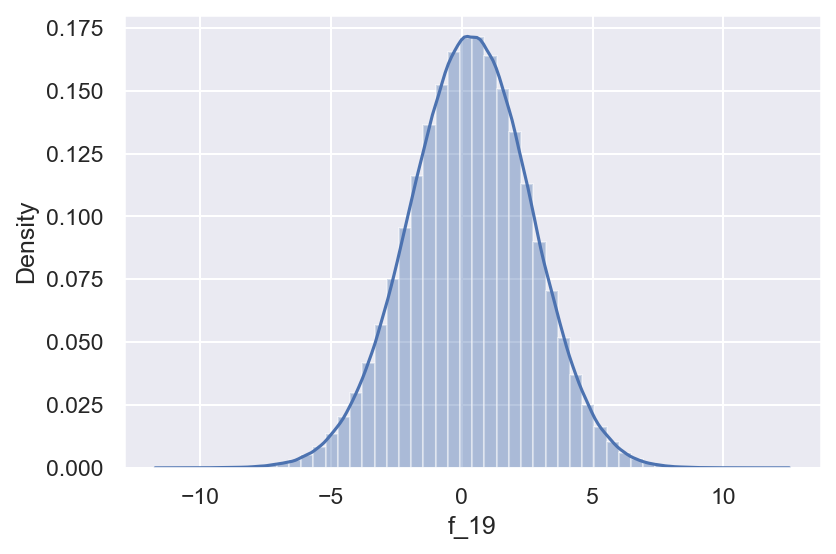

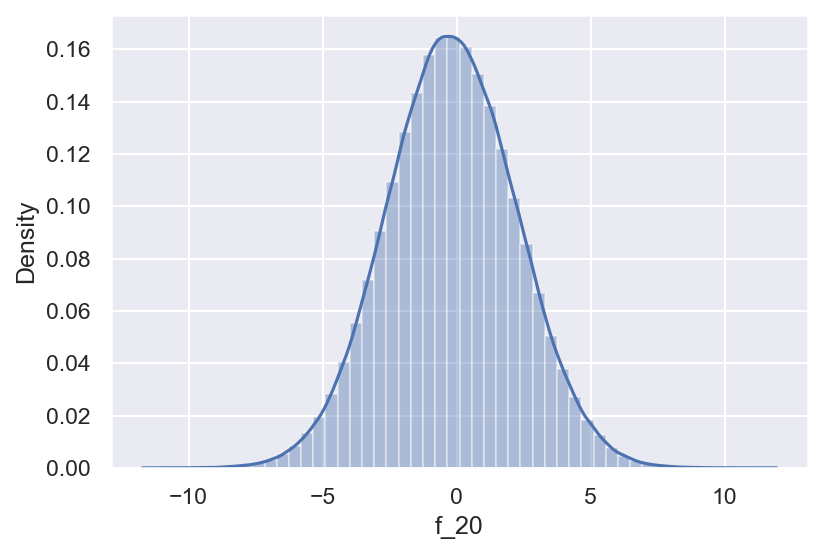

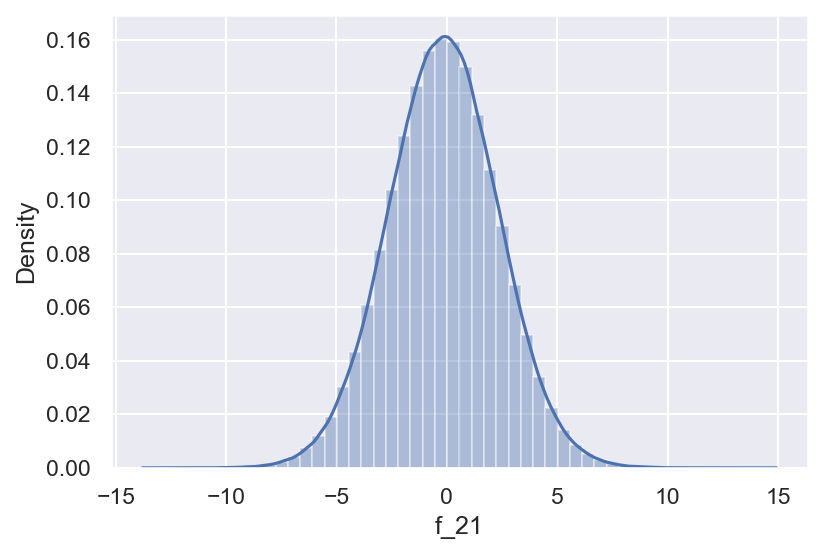

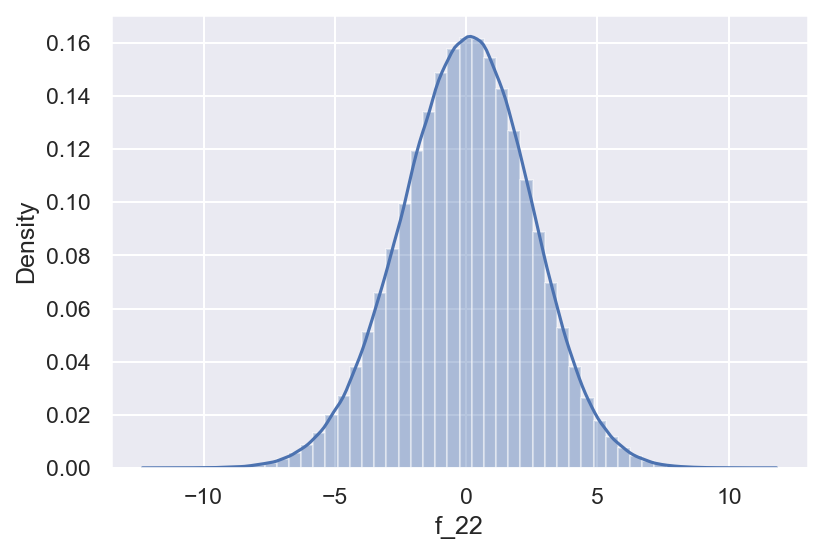

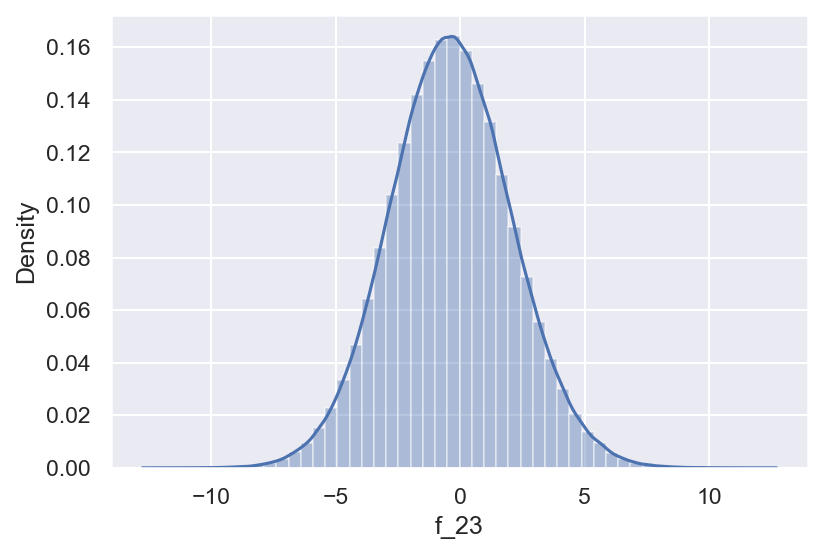

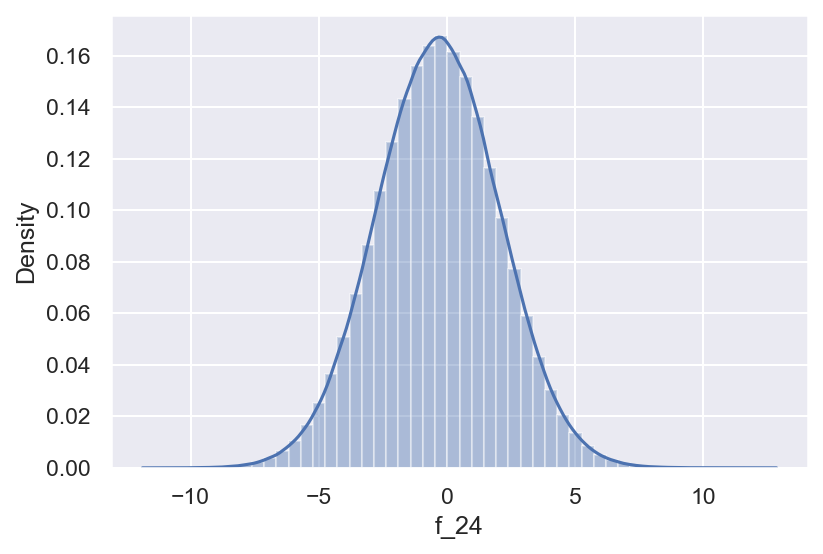

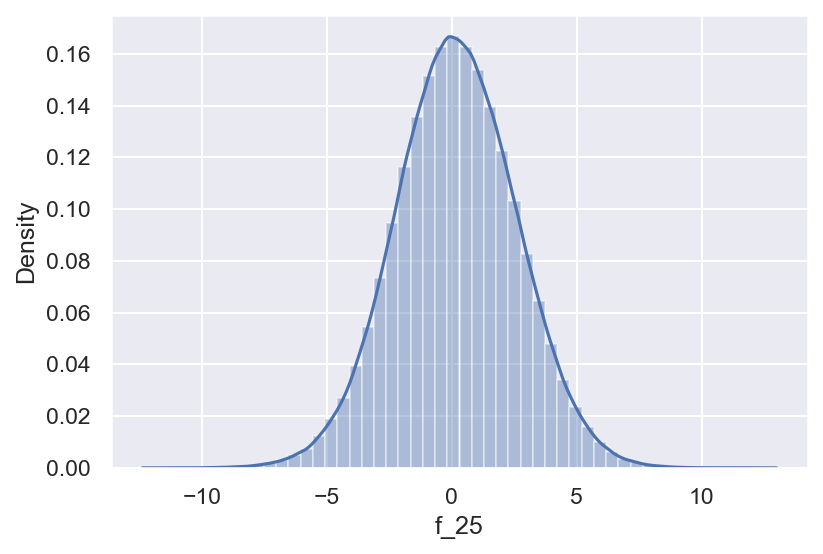

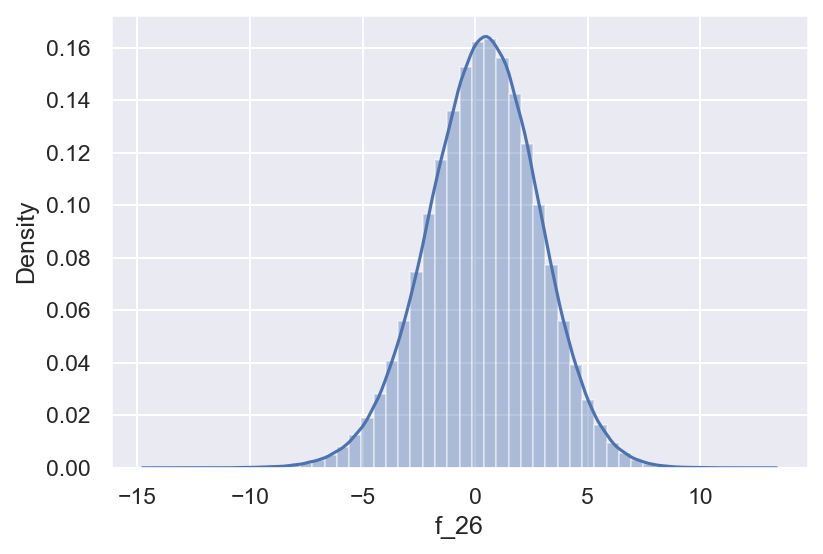

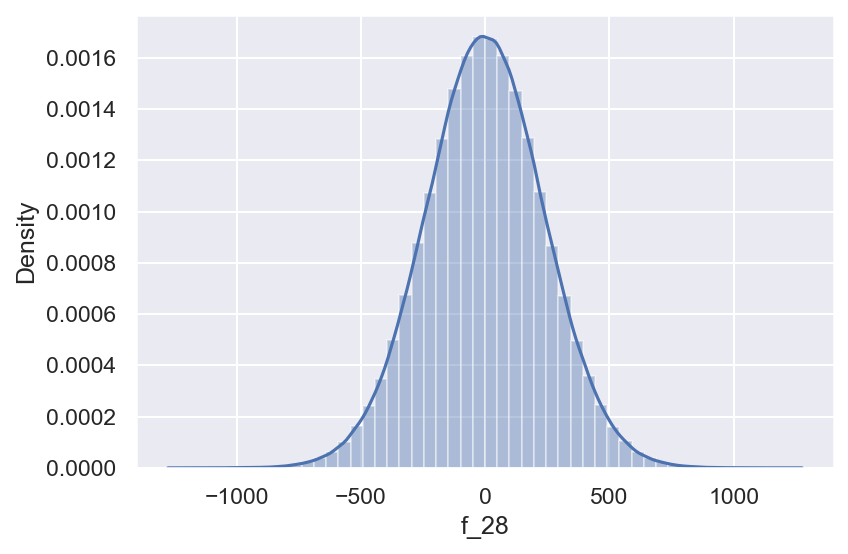

In [119]:
   


for col in tqdm(num_cols):
    plt.figure(dpi=150)
    sns.distplot(train_data[col])
    
#sns.distplot(train_data['f_30'])

In [118]:
predictions = lr.predict(test_data.drop('id', axis=1))
submitions = pd.DataFrame()
submitions['id'] = test.id
submitions['target']=predictions.astype(int)
submitions = submitions.reset_index(drop=True)
submitions.to_csv('sample_submission.csv', index=False)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
